In [7]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
os.getcwd()

'/content'

In [9]:
# 作業フォルダへの移動を行います。
# 人によって作業場所が異なるので、その場合作業場所を変更してください。
import os
os.chdir('/content/drive/MyDrive/就活/選考記録/選考記録/NTTdocomo/python') #ここを変更。

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df_treat = pd.read_csv("data/CPID5436_treat.csv")
df_control = pd.read_csv("data/CPID5436_control.csv")

In [12]:
df_treat["treatment"]=1
df_control["treatment"]=0
df = pd.concat([df_treat,df_control],ignore_index=True)

In [13]:
df["DPOINTS_USE_CP"]=df["DPOINTS_USE_202407"]+df["DPOINTS_USE_202408"]+df["DPOINTS_USE_202409"]
df["DPOINTS_GIVE_CP"]=df["DPOINTS_GIVE_202407"]+df["DPOINTS_GIVE_202408"]+df["DPOINTS_GIVE_202409"]
df["DPAY_SETTLEMENT_AMOUNT_CP"]=df["DPAY_SETTLEMENT_AMOUNT_202407"]+df["DPAY_SETTLEMENT_AMOUNT_202408"]+df["DPAY_SETTLEMENT_AMOUNT_202409"]

df["GENDER"]=np.where(df["GENDER"]==1,1,np.where(df["GENDER"]==2,0,np.nan))

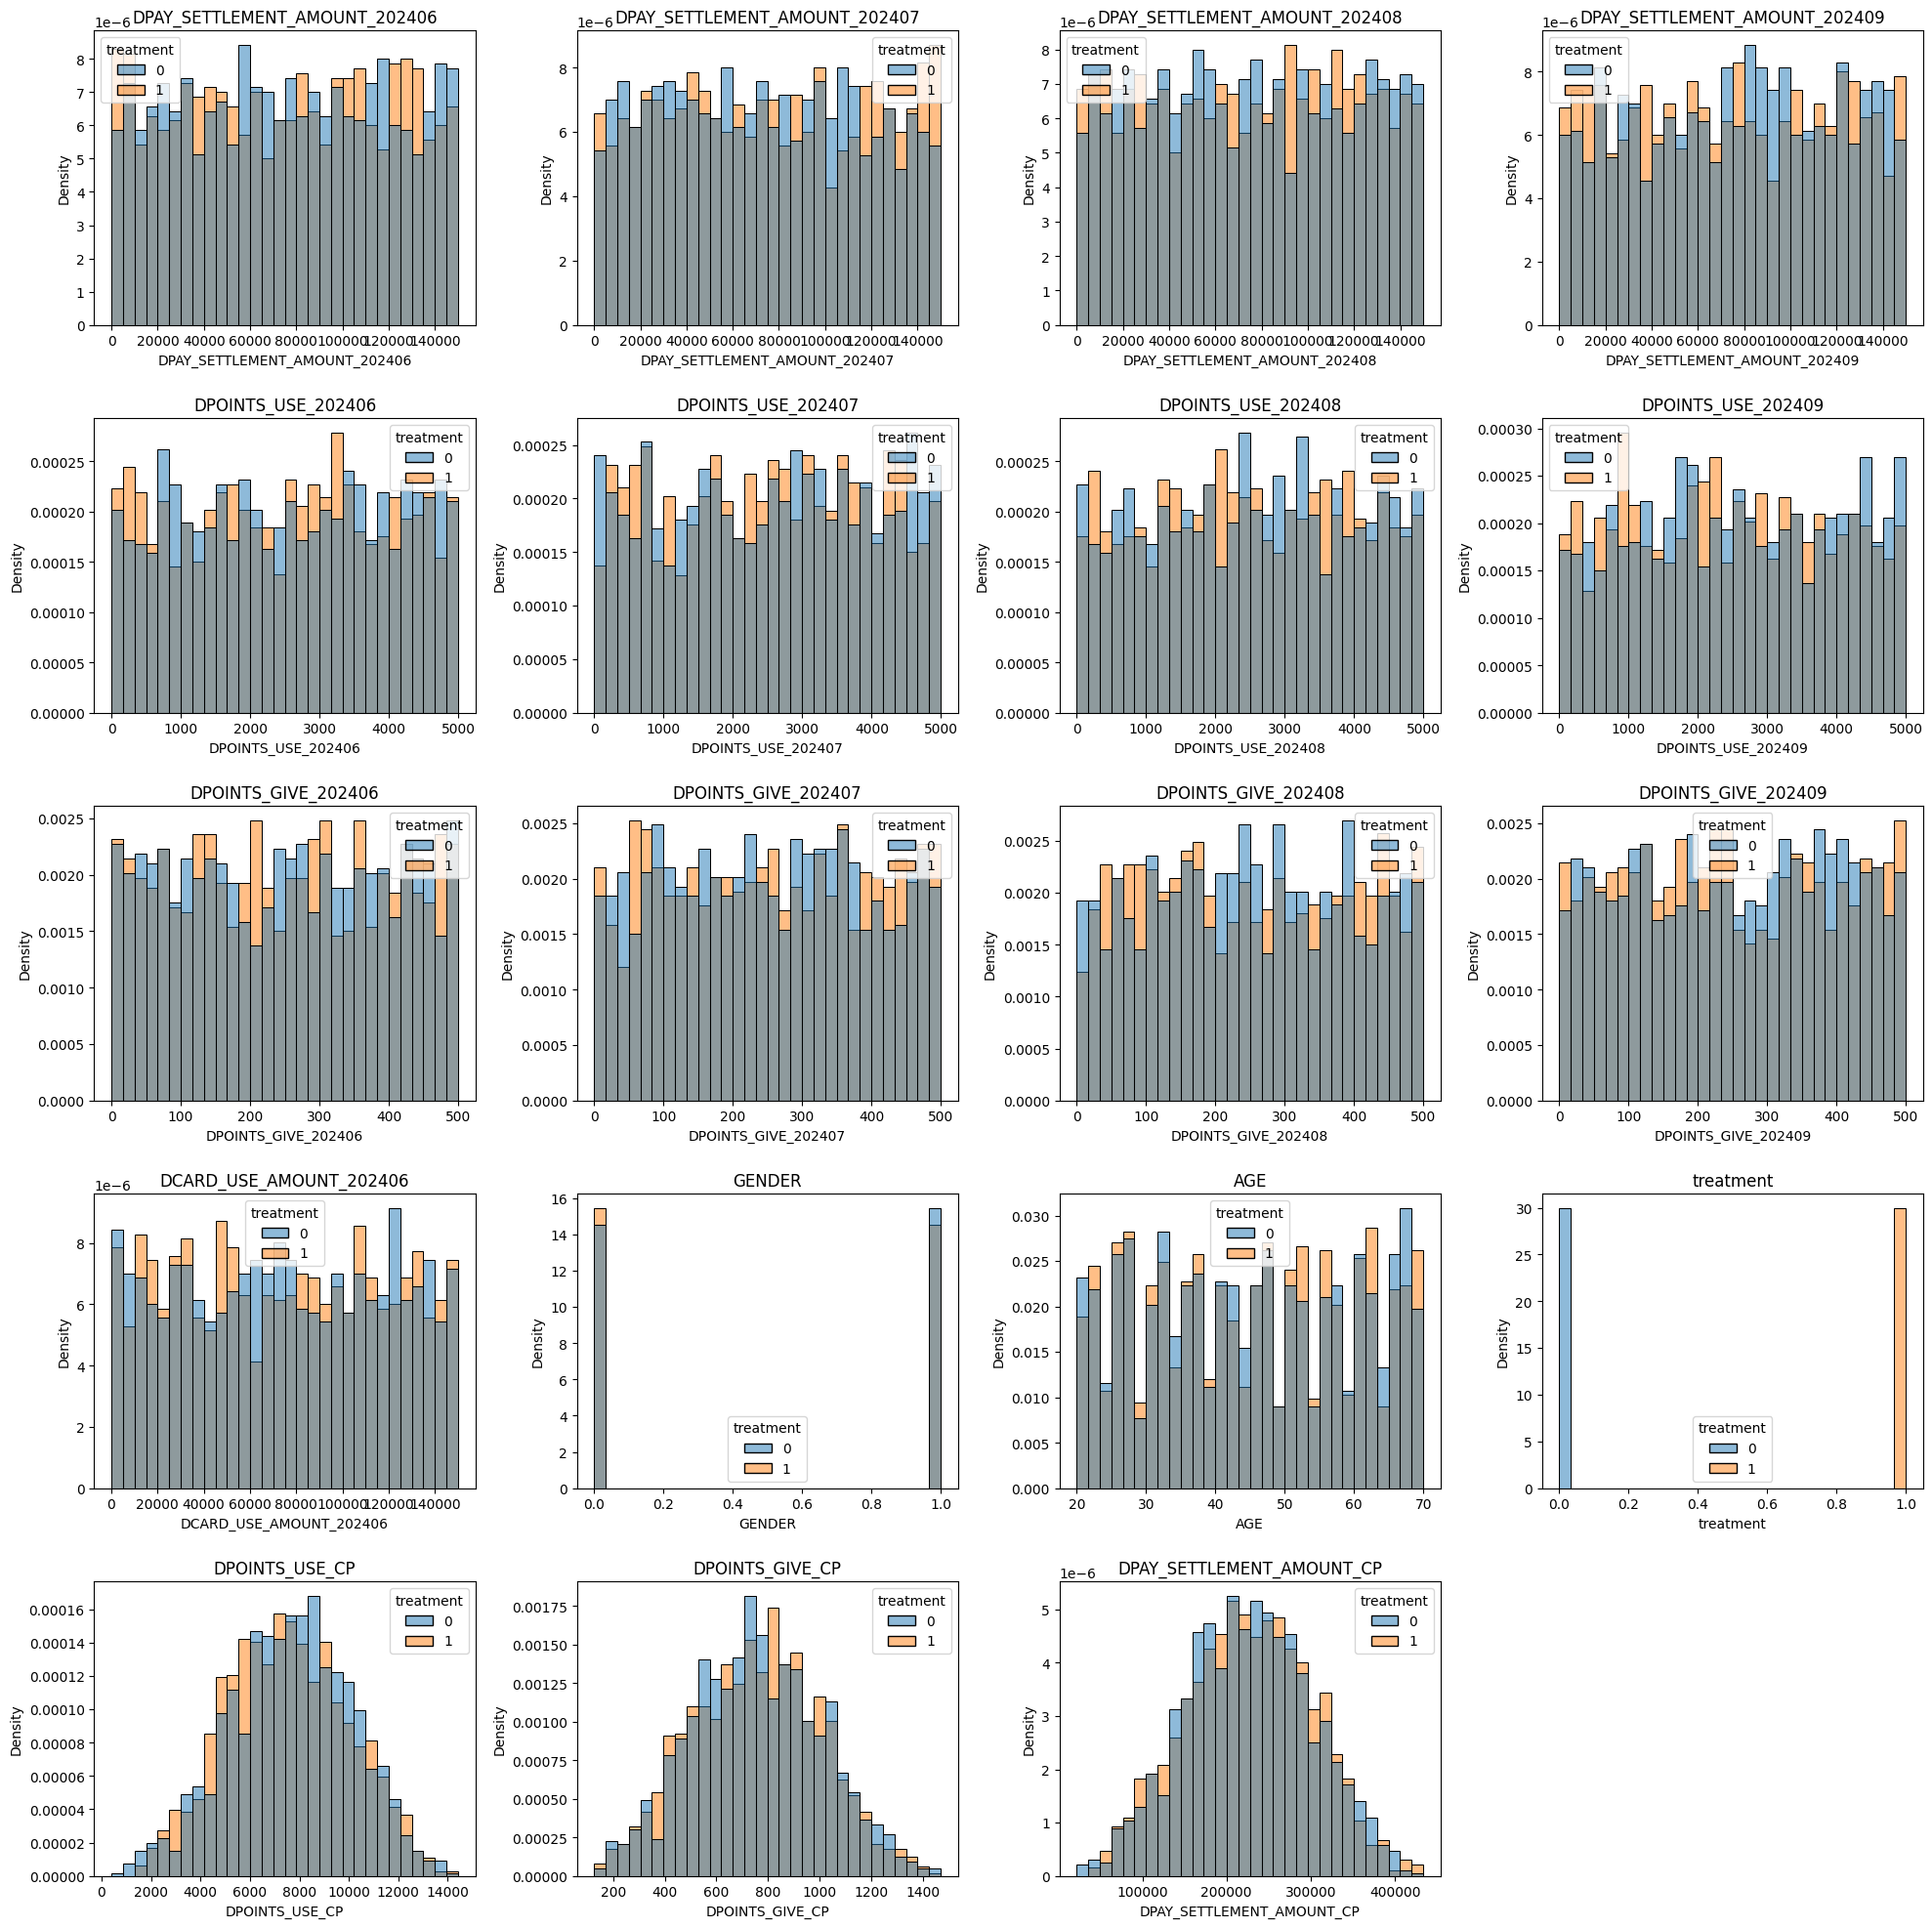

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 数値列とカテゴリ列を取得
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
all_cols = num_cols + cat_cols

n_cols = 4
n_rows = int(np.ceil(len(all_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(all_cols):
    ax = axes[i]
    if col in num_cols:
        sns.histplot(data=df, x=col, hue="treatment", kde=False, bins=30,
                     #element="step",
                     stat="density", common_norm=False, ax=ax)
    else:
        sns.countplot(data=df, x=col, hue="treatment", ax=ax)
    ax.set_title(col)

# 余ったsubplotを非表示に
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DPAY_SETTLEMENT_AMOUNT_202406  2800 non-null   int64  
 1   DPAY_SETTLEMENT_AMOUNT_202407  2800 non-null   int64  
 2   DPAY_SETTLEMENT_AMOUNT_202408  2800 non-null   int64  
 3   DPAY_SETTLEMENT_AMOUNT_202409  2800 non-null   int64  
 4   DPOINTS_USE_202406             2800 non-null   int64  
 5   DPOINTS_USE_202407             2800 non-null   int64  
 6   DPOINTS_USE_202408             2800 non-null   int64  
 7   DPOINTS_USE_202409             2800 non-null   int64  
 8   DPOINTS_GIVE_202406            2800 non-null   int64  
 9   DPOINTS_GIVE_202407            2800 non-null   int64  
 10  DPOINTS_GIVE_202408            2800 non-null   int64  
 11  DPOINTS_GIVE_202409            2800 non-null   int64  
 12  DCARD_USE_AMOUNT_202406        2800 non-null   i

In [9]:
df.describe()

,DPAY_SETTLEMENT_AMOUNT_202406,DPAY_SETTLEMENT_AMOUNT_202407,DPAY_SETTLEMENT_AMOUNT_202408,DPAY_SETTLEMENT_AMOUNT_202409,DPOINTS_USE_202406,DPOINTS_USE_202407,DPOINTS_USE_202408,DPOINTS_USE_202409,DPOINTS_GIVE_202406,DPOINTS_GIVE_202407,DPOINTS_GIVE_202408,DPOINTS_GIVE_202409,DCARD_USE_AMOUNT_202406,GENDER,AGE,treatment,DPOINTS_USE_CP,DPOINTS_GIVE_CP,DPAY_SETTLEMENT_AMOUNT_CP
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,75187.351429,74722.017500,75369.256429,75877.420000,2522.045714,2524.213929,2523.342857,2525.737500,249.063929,251.807857,251.044643,251.991786,74491.414286,0.499643,44.998571,0.500000,7573.294286,754.844286,225968.693929
std,43529.495437,43202.440622,43452.363038,43285.105404,1450.145647,1440.083906,1426.604227,1428.566234,146.536395,143.824998,143.643939,145.765786,43809.731767,0.500089,14.795401,0.500089,2473.369476,251.363617,74908.957076
min,20.000000,14.000000,24.000000,45.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,20.000000,0.000000,402.000000,126.000000,22132.000000
25%,37372.500000,36949.750000,37011.750000,38292.250000,1278.000000,1294.500000,1317.000000,1288.750000,122.000000,126.750000,127.000000,124.000000,35407.500000,0.000000,32.000000,0.000000,5812.250000,567.000000,172762.750000
50%,76035.000000,74098.500000,75592.500000,77485.000000,2558.000000,2575.500000,2516.500000,2510.000000,251.500000,251.500000,248.000000,247.000000,74478.500000,0.000000,45.000000,0.500000,7608.000000,753.000000,226985.000000
75%,113294.250000,112182.500000,113215.750000,113139.500000,3744.000000,3744.250000,3755.500000,3778.250000,377.000000,372.250000,378.250000,379.000000,112777.000000,1.000000,58.000000,1.000000,9342.000000,930.000000,278920.000000
max,150000.000000,149991.000000,149980.000000,149988.000000,4998.000000,4994.000000,4995.000000,5000.000000,500.000000,500.000000,500.000000,500.000000,149952.000000,1.000000,70.000000,1.000000,14414.000000,1469.000000,433506.000000


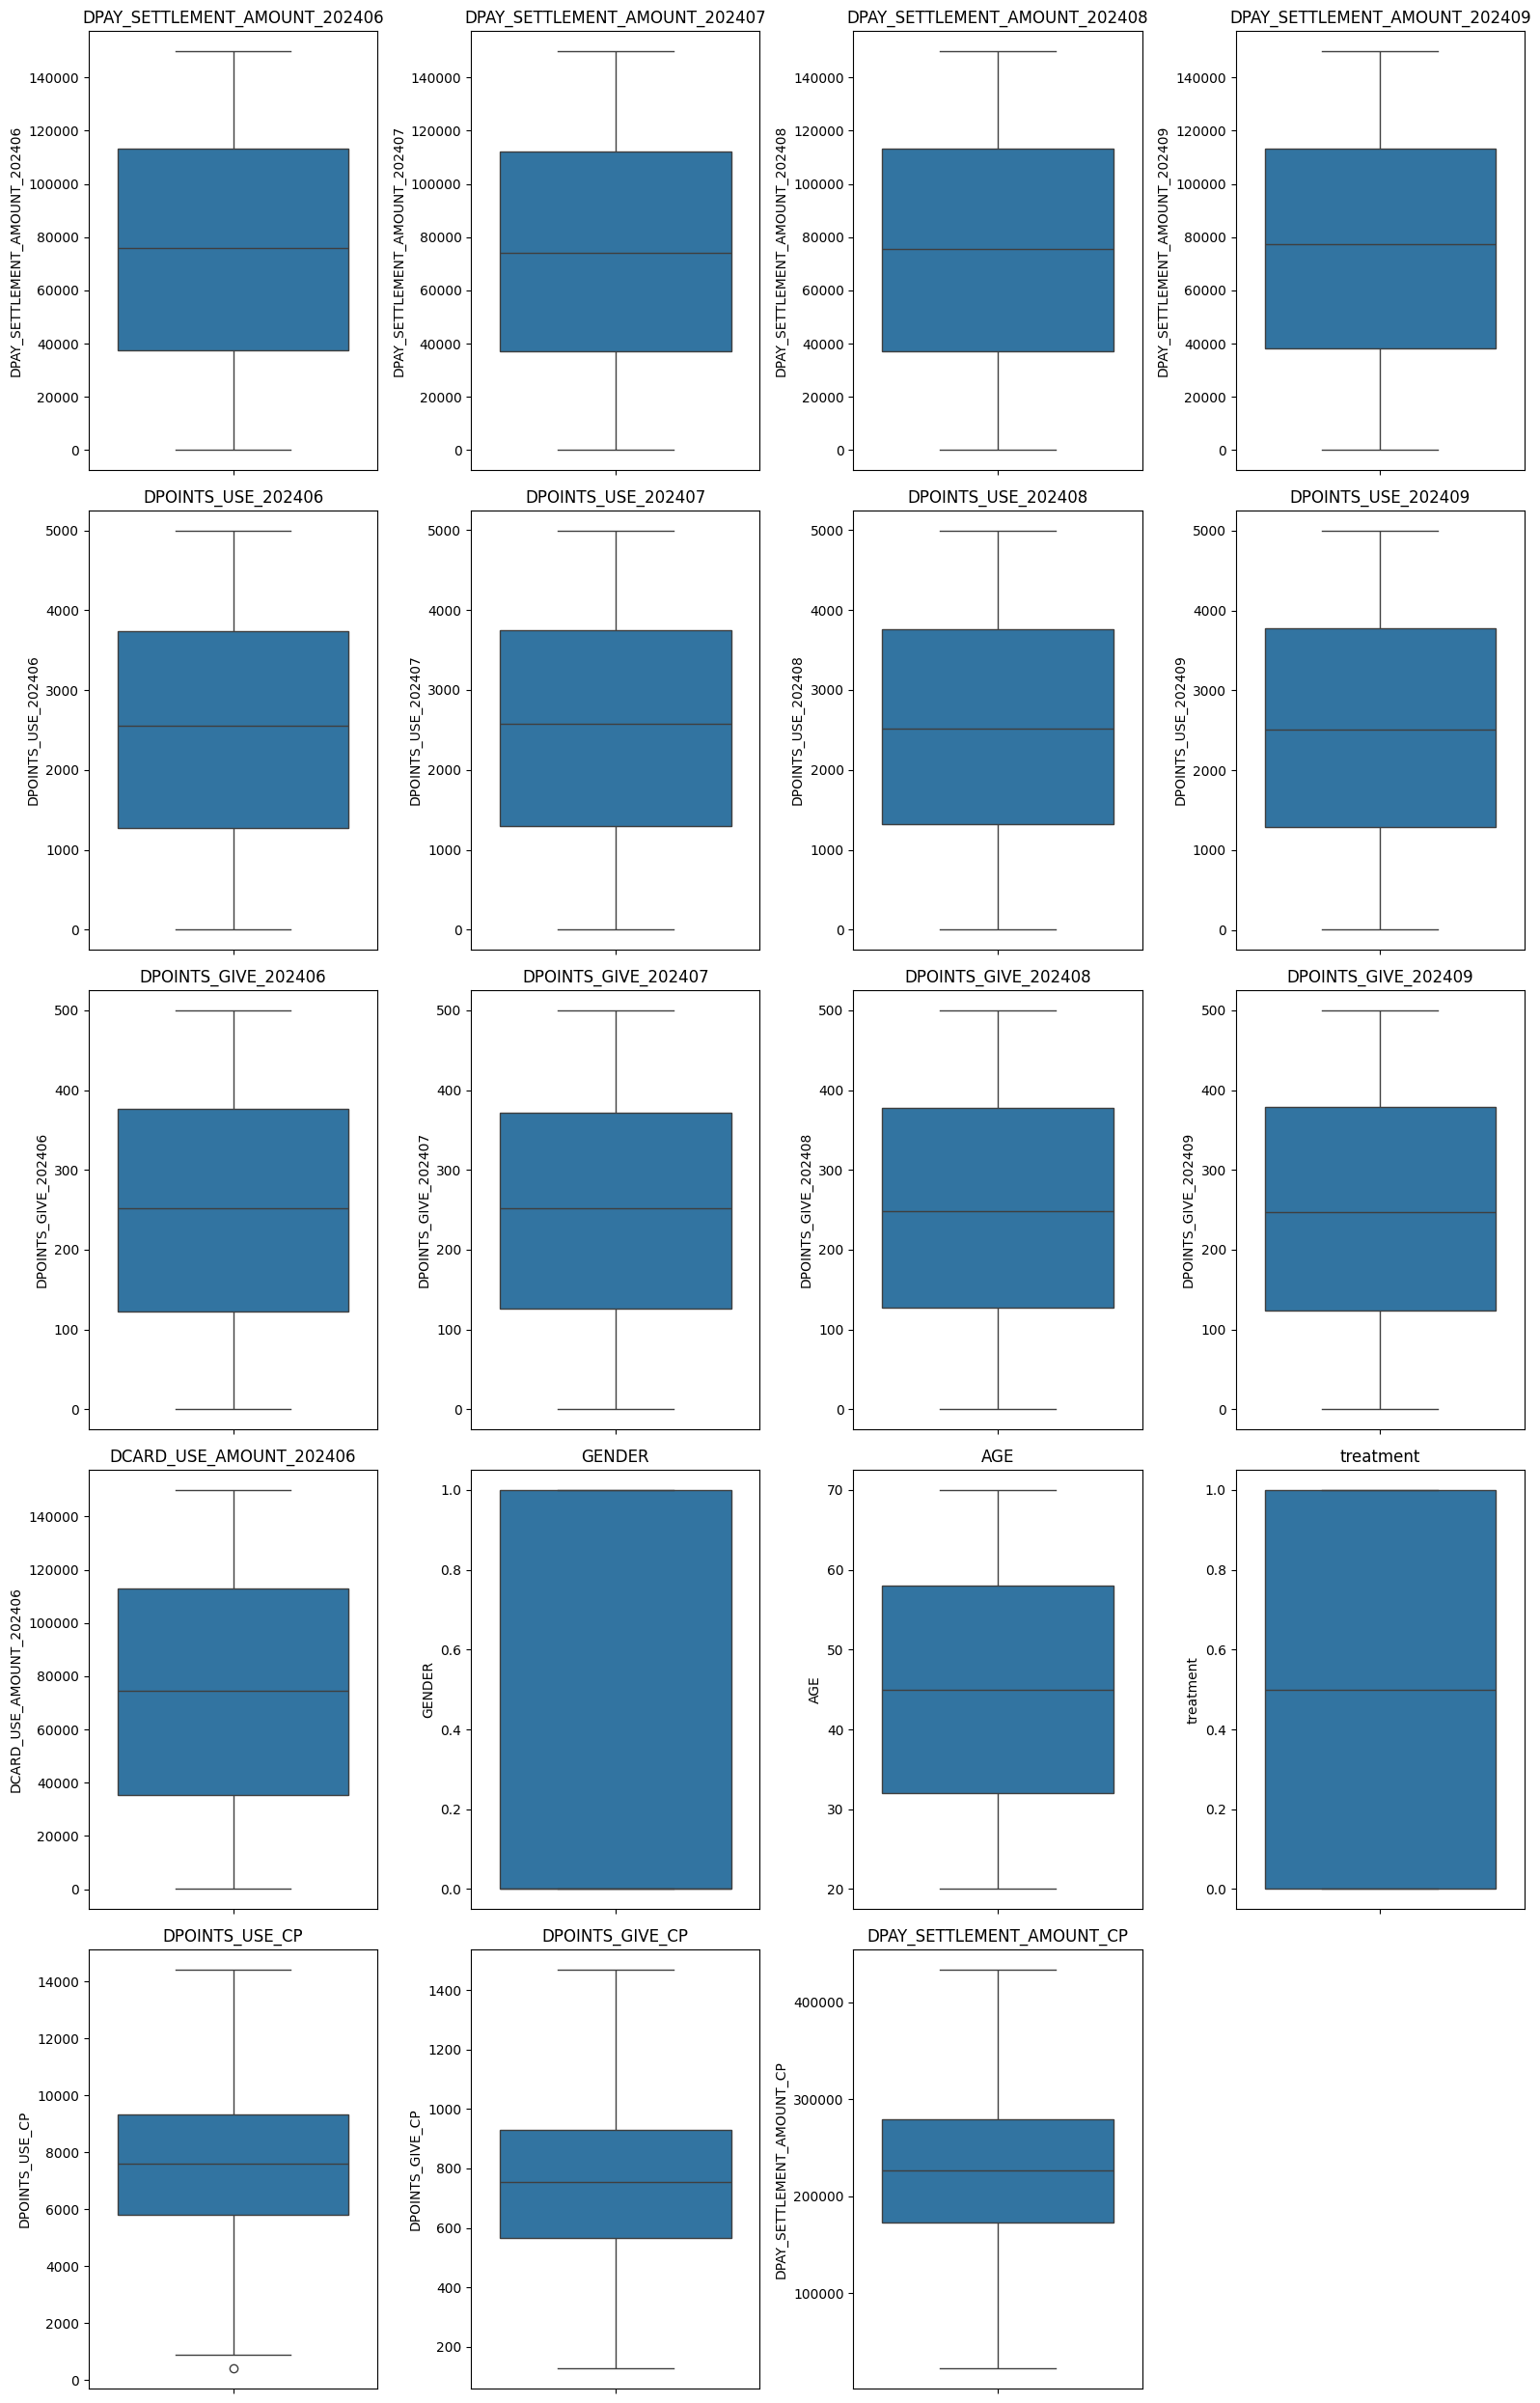

In [10]:
import math

num_cols = df.select_dtypes(include=[np.number]).columns
n_cols = len(num_cols)

# 1行に4プロットずつ配置
n_per_row = 4
n_rows = math.ceil(n_cols / n_per_row)

fig, axes = plt.subplots(n_rows, n_per_row, figsize=(4*n_per_row, 5*n_rows))

# 2次元配列をフラットに
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# 余ったサブプロットを非表示
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
# 欠損の検出
print("欠損数:")
print(df.isnull().sum())
print("\nデータ全体の欠損数:", df.isnull().sum().sum())

欠損数:
DPAY_SETTLEMENT_AMOUNT_202406    0
DPAY_SETTLEMENT_AMOUNT_202407    0
DPAY_SETTLEMENT_AMOUNT_202408    0
DPAY_SETTLEMENT_AMOUNT_202409    0
DPOINTS_USE_202406               0
DPOINTS_USE_202407               0
DPOINTS_USE_202408               0
DPOINTS_USE_202409               0
DPOINTS_GIVE_202406              0
DPOINTS_GIVE_202407              0
DPOINTS_GIVE_202408              0
DPOINTS_GIVE_202409              0
DCARD_USE_AMOUNT_202406          0
GENDER                           0
AGE                              0
treatment                        0
DPOINTS_USE_CP                   0
DPOINTS_GIVE_CP                  0
DPAY_SETTLEMENT_AMOUNT_CP        0
dtype: int64

データ全体の欠損数: 0


In [12]:
#欠損処理：欠損を最大値×10の値で埋める
MAX_NUM = 10
df_filled = df.copy()
for col in df.columns:
    if df[col].isnull().any():  # 欠損がある列だけ処理
        df_filled[col] = df[col].fillna(df[col].max() * MAX_NUM)

#0で埋める
#df_zerofill = df.fillna(0)
print("欠損処理後の欠損数:", df_filled.isnull().sum().sum())

欠損処理後の欠損数: 0


In [13]:
#外れ値の検出
# 数値列のみ対象
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Zスコアの計算
z_scores = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

#Zスコアが3以上のデータを外れ値とする
threshold = 3
outlier_mask = (np.abs(z_scores) > threshold)

# 外れ値のあるセルをTrue にしたマスク
#outlier_mask.head()

# 外れ値の行を抽出
outliers = df[outlier_mask.any(axis=1)]
print("外れ値候補 (Zスコア法):")
outliers.head()

外れ値候補 (Zスコア法):


,DPAY_SETTLEMENT_AMOUNT_202406,DPAY_SETTLEMENT_AMOUNT_202407,DPAY_SETTLEMENT_AMOUNT_202408,DPAY_SETTLEMENT_AMOUNT_202409,DPOINTS_USE_202406,DPOINTS_USE_202407,DPOINTS_USE_202408,DPOINTS_USE_202409,DPOINTS_GIVE_202406,DPOINTS_GIVE_202407,DPOINTS_GIVE_202408,DPOINTS_GIVE_202409,DCARD_USE_AMOUNT_202406,GENDER,AGE,treatment,DPOINTS_USE_CP,DPOINTS_GIVE_CP,DPAY_SETTLEMENT_AMOUNT_CP


In [14]:
#外れ値処理：winsorization
# 数値列のみ対象
df_=df
num_cols = df.select_dtypes(include=[np.number]).columns

# 各列ごとに 1% と 99% の分位点を計算
lower = df[num_cols].quantile(0.01)
upper = df[num_cols].quantile(0.99)

# clipで外れ値を処理（1%点と99%点に丸める）
df[num_cols] = df[num_cols].clip(lower=lower, upper=upper, axis=1)
print(f"処理後：{len(df)}")

処理後：2800


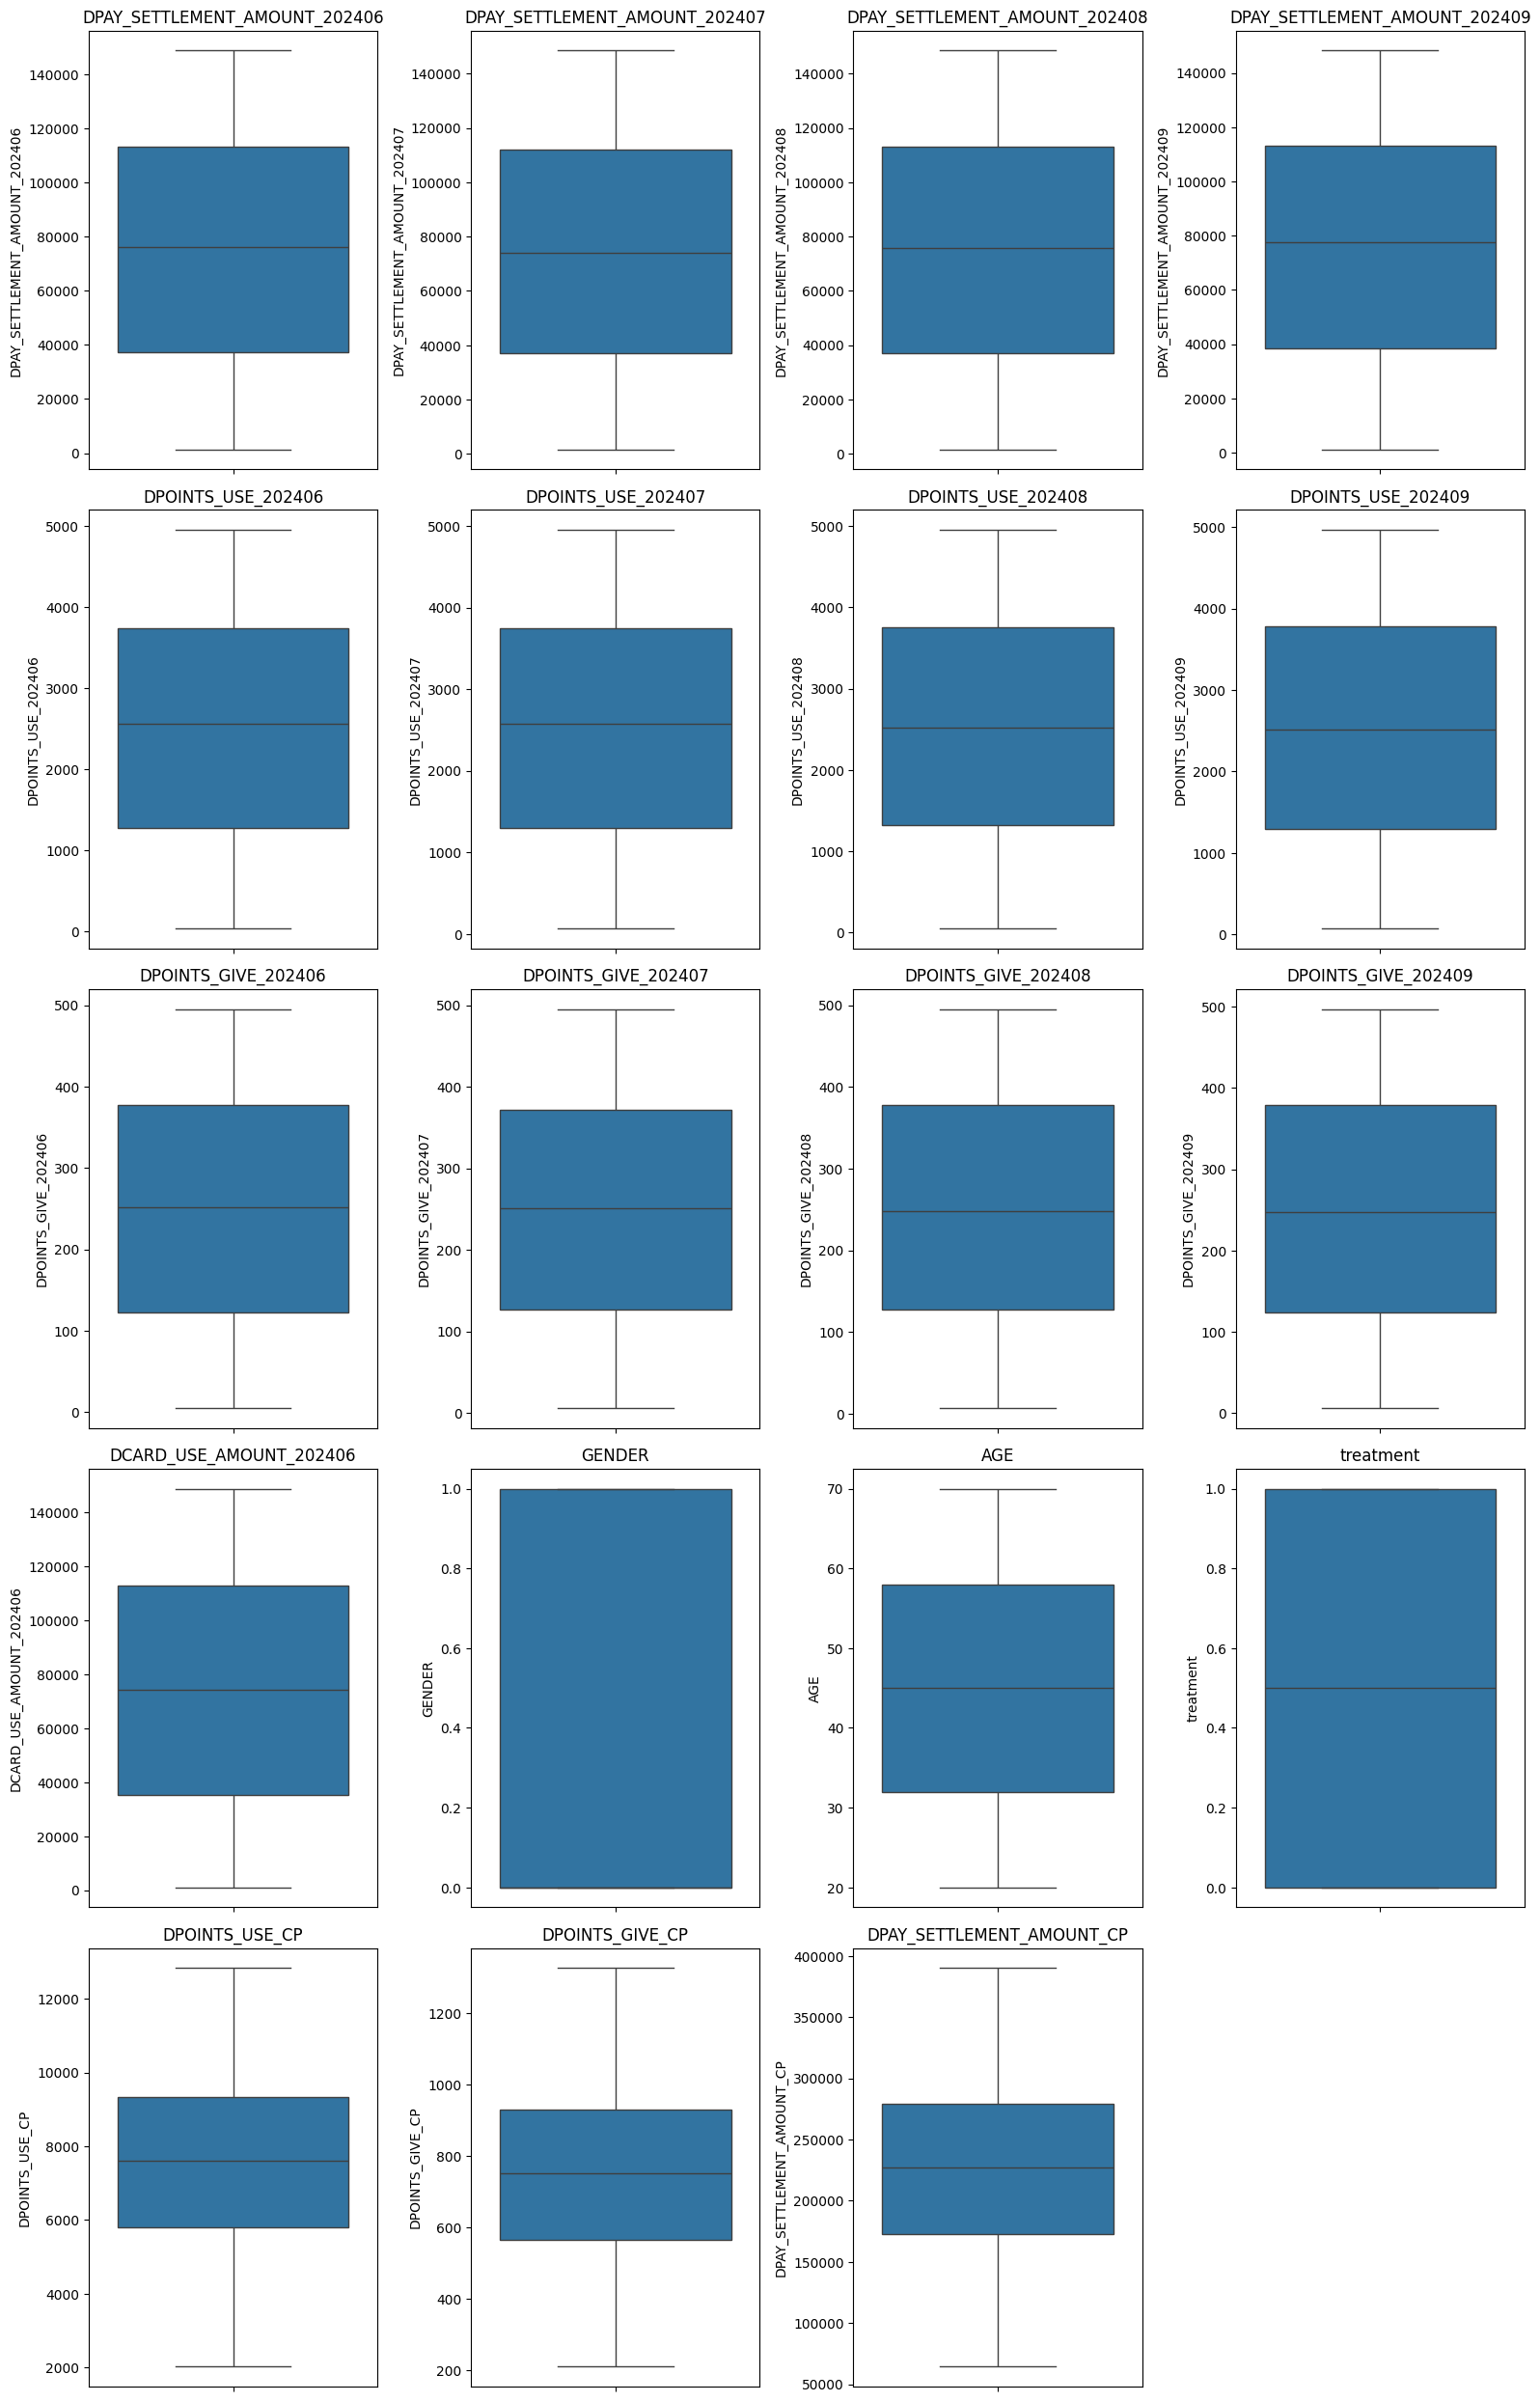

In [15]:
import math

num_cols = df.select_dtypes(include=[np.number]).columns
n_cols = len(num_cols)

# 1行に4プロットずつ配置
n_per_row = 4
n_rows = math.ceil(n_cols / n_per_row)

fig, axes = plt.subplots(n_rows, n_per_row, figsize=(4*n_per_row, 5*n_rows))

# 2次元配列をフラットに
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# 余ったサブプロットを非表示
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

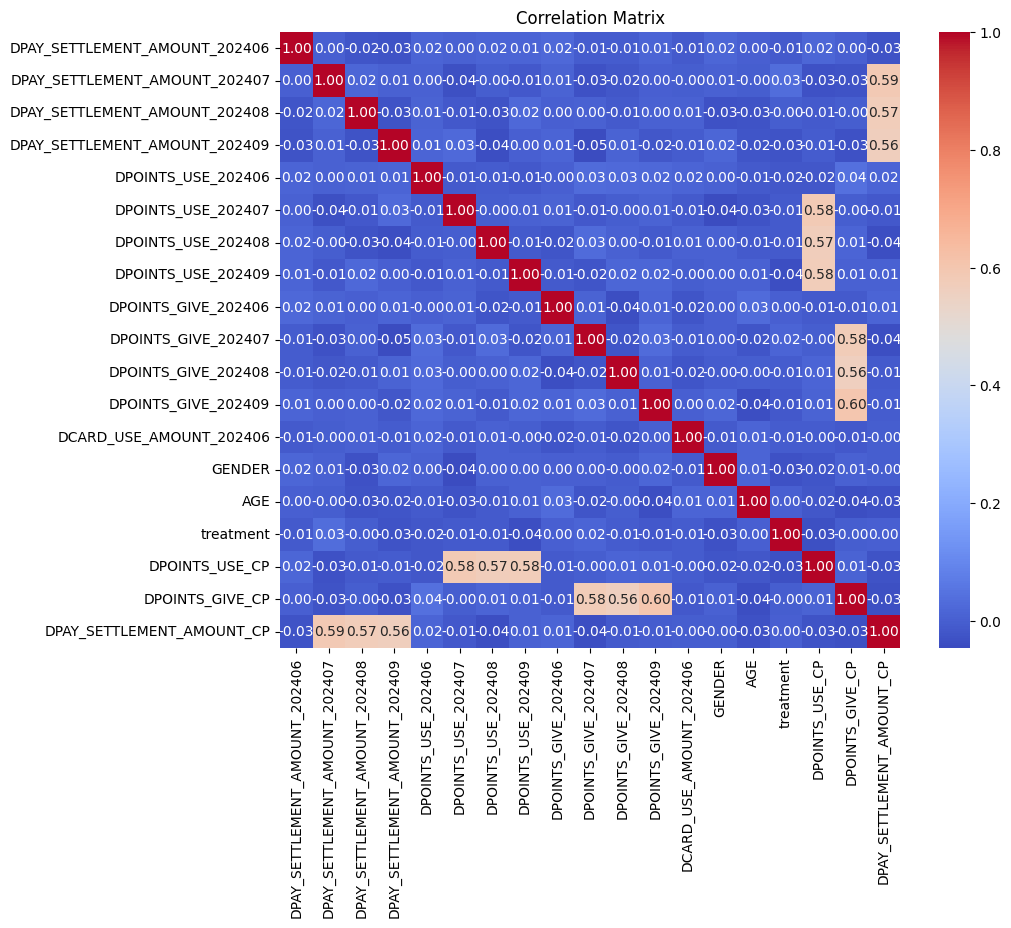

In [16]:
# 相関行列を可視化（ヒートマップ）
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [17]:
df.head()

,DPAY_SETTLEMENT_AMOUNT_202406,DPAY_SETTLEMENT_AMOUNT_202407,DPAY_SETTLEMENT_AMOUNT_202408,DPAY_SETTLEMENT_AMOUNT_202409,DPOINTS_USE_202406,DPOINTS_USE_202407,DPOINTS_USE_202408,DPOINTS_USE_202409,DPOINTS_GIVE_202406,DPOINTS_GIVE_202407,DPOINTS_GIVE_202408,DPOINTS_GIVE_202409,DCARD_USE_AMOUNT_202406,GENDER,AGE,treatment,DPOINTS_USE_CP,DPOINTS_GIVE_CP,DPAY_SETTLEMENT_AMOUNT_CP
0,140481.0,54396.0,83390.0,3567.0,35.99,217.0,3274.0,2569,344,421.0,128.0,75.0,80783.00,1.0,52,1,6060.0,624.0,141353.0
1,76516.0,6305.0,29880.0,82146.0,4198.00,3722.0,238.0,1760,457,393.0,368.0,370.0,148902.03,1.0,21,1,5720.0,1131.0,118331.0
2,108504.0,27883.0,25752.0,44144.0,4455.00,3587.0,1093.0,2944,247,236.0,486.0,57.0,98563.00,0.0,24,1,7624.0,779.0,97779.0
3,23154.0,1691.0,98317.0,82911.0,4098.00,2632.0,3768.0,2153,21,254.0,431.0,308.0,103867.00,0.0,23,1,8553.0,993.0,182919.0
4,6475.0,147056.0,97382.0,78732.0,4139.00,4411.0,585.0,3092,29,140.0,410.0,183.0,48151.00,1.0,64,1,8088.0,733.0,323170.0


In [18]:
#共変量
#共変量の標準化
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_cols = ["AGE","DPAY_SETTLEMENT_AMOUNT_202406","DPOINTS_USE_202406","DPOINTS_GIVE_202406","DCARD_USE_AMOUNT_202406"]

In [19]:
X_scalar = scalar.fit_transform(df[X_cols])#修正

# 修正：標準化した列を df に追加
df = df.copy()
for i, col in enumerate(X_cols):
    df[col + "_std"] = X_scalar[:, i]

In [20]:
#アウトカム、処置変数
df["Y"] = df["DPAY_SETTLEMENT_AMOUNT_CP"]  #決済金額をアウトカムにする場合
df["T"] = df["treatment"]

In [21]:
df[df["T"]==1]

,DPAY_SETTLEMENT_AMOUNT_202406,DPAY_SETTLEMENT_AMOUNT_202407,DPAY_SETTLEMENT_AMOUNT_202408,DPAY_SETTLEMENT_AMOUNT_202409,DPOINTS_USE_202406,DPOINTS_USE_202407,DPOINTS_USE_202408,DPOINTS_USE_202409,DPOINTS_GIVE_202406,DPOINTS_GIVE_202407,...,DPOINTS_USE_CP,DPOINTS_GIVE_CP,DPAY_SETTLEMENT_AMOUNT_CP,AGE_std,DPAY_SETTLEMENT_AMOUNT_202406_std,DPOINTS_USE_202406_std,DPOINTS_GIVE_202406_std,DCARD_USE_AMOUNT_202406_std,Y,T
0,140481.0,54396.0,83390.0,3567.0,35.99,217.0,3274.0,2569,344,421.0,...,6060.0,624.0,141353.0,0.473301,1.501069,-1.715425,0.648365,0.143689,141353.0,1
1,76516.0,6305.0,29880.0,82146.0,4198.00,3722.0,238.0,1760,457,393.0,...,5720.0,1131.0,118331.0,-1.622319,0.030524,1.156488,1.420082,1.699541,118331.0,1
2,108504.0,27883.0,25752.0,44144.0,4455.00,3587.0,1093.0,2944,247,236.0,...,7624.0,779.0,97779.0,-1.419517,0.765923,1.333826,-0.014083,0.549788,97779.0,1
3,23154.0,1691.0,98317.0,82911.0,4098.00,2632.0,3768.0,2153,21,254.0,...,8553.0,993.0,182919.0,-1.487118,-1.196260,1.087485,-1.557518,0.670932,182919.0,1
4,6475.0,147056.0,97382.0,78732.0,4139.00,4411.0,585.0,3092,29,140.0,...,8088.0,733.0,323170.0,1.284509,-1.579707,1.115776,-1.502884,-0.601632,323170.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,132242.0,146424.0,52925.0,107562.0,3355.00,2946.0,3761.0,2274,445,492.0,...,8981.0,1081.0,306911.0,-1.689919,1.311655,0.574792,1.338130,-1.581522,306911.0,1
1396,107733.0,48668.0,15212.0,74412.0,4762.00,1120.0,4616.0,1742,250,148.0,...,7478.0,712.0,138292.0,0.608502,0.748198,1.545665,0.006405,0.110502,138292.0,1
1397,40361.0,65685.0,98806.0,84379.0,1774.00,1362.0,3017.0,2174,121,317.0,...,6553.0,1075.0,248870.0,-0.270306,-0.800674,-0.516146,-0.874582,-0.399679,248870.0,1
1398,103309.0,23288.0,65703.0,19536.0,941.00,1695.0,2158.0,2961,110,52.0,...,6814.0,437.0,108527.0,1.352109,0.646490,-1.090941,-0.949705,-1.186113,108527.0,1


In [22]:
df[df["T"]==0]

,DPAY_SETTLEMENT_AMOUNT_202406,DPAY_SETTLEMENT_AMOUNT_202407,DPAY_SETTLEMENT_AMOUNT_202408,DPAY_SETTLEMENT_AMOUNT_202409,DPOINTS_USE_202406,DPOINTS_USE_202407,DPOINTS_USE_202408,DPOINTS_USE_202409,DPOINTS_GIVE_202406,DPOINTS_GIVE_202407,...,DPOINTS_USE_CP,DPOINTS_GIVE_CP,DPAY_SETTLEMENT_AMOUNT_CP,AGE_std,DPAY_SETTLEMENT_AMOUNT_202406_std,DPOINTS_USE_202406_std,DPOINTS_GIVE_202406_std,DCARD_USE_AMOUNT_202406_std,Y,T
1400,129342.0,12214.0,3336.0,16991.0,2212.0,778.0,4804.0,3058,178,441.0,...,8640.0,789.0,64277.97,-0.743510,1.244985,-0.213912,-0.485309,-0.975115,64277.97,0
1401,107639.0,69696.0,50169.0,111476.0,932.0,3253.0,2872.0,4607,45,319.0,...,10732.0,1045.0,231341.00,1.014106,0.746036,-1.097151,-1.393614,-0.485056,231341.00,0
1402,35474.0,115087.0,99501.0,94664.0,1546.0,1274.0,704.0,4553,170,469.0,...,6531.0,914.0,309252.00,0.067697,-0.913025,-0.673473,-0.539944,-0.031267,309252.00,0
1403,43754.0,15558.0,48115.0,100349.0,2429.0,1372.0,3261.0,3969,75,398.0,...,8602.0,770.0,164022.00,0.811304,-0.722669,-0.064176,-1.188733,1.558411,164022.00,0
1404,21623.0,137128.0,146710.0,84231.0,4800.0,3777.0,1974.0,1855,84,473.0,...,7606.0,1154.0,368069.00,-0.270306,-1.231457,1.571886,-1.127269,1.600482,368069.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,140003.0,25960.0,132391.0,108950.0,1126.0,2920.0,4596.0,4316,448,100.0,...,11832.0,481.0,267301.00,-0.811111,1.490079,-0.963285,1.358618,1.078241,267301.00,0
2796,104505.0,57794.0,76888.0,74164.0,187.0,2748.0,913.0,2093,96,46.0,...,5754.0,464.0,208846.00,-0.811111,0.673986,-1.611224,-1.045316,1.337774,208846.00,0
2797,68469.0,119521.0,21137.0,73975.0,4085.0,1389.0,4784.0,1911,9,66.0,...,8084.0,583.0,214633.00,1.487311,-0.154475,1.078515,-1.639471,1.569100,214633.00,0
2798,31089.0,135520.0,13412.0,91255.0,2766.0,1691.0,47.0,793,249,54.0,...,2526.0,708.0,240187.00,-1.013913,-1.013835,0.168364,-0.000424,-0.295437,240187.00,0


In [23]:
#傾向スコア（P(T=1|X)）の推定 with ロジスティック回帰
#アウトカム回帰（E[Y|T,X]）の推定 with ランダムフォレスト（処置群ごと）
#層化抽出法を使ったK-分割交差検証 (Stratified K-Fold CV)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
# 追加インポート
from xgboost import XGBRegressor


X_cols = ["AGE_std","DPAY_SETTLEMENT_AMOUNT_202406_std",
          "DPOINTS_USE_202406_std","DPOINTS_GIVE_202406_std",
          "DCARD_USE_AMOUNT_202406_std","GENDER"]
#GridSearch：設定
param_grid_ps = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
    "max_iter": [2000]
}
param_grid_rf = {
    "n_estimators": [10, 50, 100, 150],
    "max_depth": [5, 10, 50, None],
    "max_features": ["sqrt", "log2", None]
}

# 【XGBoost追加】XGBoost用パラメータ
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'colsample_bytree': [0.8, 1.0],
    "reg_lambda": [1.0, 3.0]
}

#Stratified K-Fold：設定
K = 5
SEED=1024
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=SEED)

#インスタンス
base_ps_model = LogisticRegression(max_iter=2000, solver='liblinear')
base_outcome_model = RandomForestRegressor(random_state=SEED)
base_outcome_model_xgb = XGBRegressor(            # ← 修正: xgb. は不要
    random_state=SEED, objective='reg:squarederror', tree_method="hist", n_jobs=-1
)


# クロスフィットで得られた予測値を格納
df["ps_hat"] = np.nan
df["mu0_rf"] = np.nan
df["mu1_rf"] = np.nan
df["mu0_xgb"] = np.nan # 【XGBoost追加】 xgb: XGBoost
df["mu1_xgb"] = np.nan

#AUC、MSE、回帰係数、変数重要度を格納
ps_scores_list = []
outcome_scores_list = []
ps_coefs_list = []
rf_importances_list = []
outcome_scores_xgb_list = [] # ← XGBoostのMSEを格納するリストを追加
xgb_importances_list = []  # ← XGBoostの変数重要度を格納するリストを追加

for train_index, test_index in kf.split(df, df["T"]):
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_index]

    #傾向スコア（P(T=1|X)）モデルの学習
    #GridSearch：cv=5
    ps_model = GridSearchCV(base_ps_model, param_grid_ps, cv=5, scoring='roc_auc',n_jobs=-1)
    ps_model.fit(df_train[X_cols], df_train["T"])
    #傾向スコア（P(T=1|X)）の推定
    ps_hat = ps_model.predict_proba(df_test[X_cols])[:, 1]
    df.loc[test_index, "ps_hat"] = ps_hat
    #AUC
    ps_scores_list.append(ps_model.best_score_)
    print(f"  Propensity Score Model AUC: {ps_model.best_score_:.4f}")
    #回帰係数
    ps_coefs_list.append(ps_model.best_estimator_.coef_[0])


    #アウトカム回帰（E[Y|T,X]）モデルの学習
    #GridSearch：cv=5
    X_aug_train = df_train[X_cols].copy()
    X_aug_train["T"] = df_train["T"]
    outcome_model = GridSearchCV(base_outcome_model, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    outcome_model.fit(X_aug_train, df_train["Y"])
    # MSE=(-1)*neg_mean_squared_error
    mse = -outcome_model.best_score_
    outcome_scores_list.append(mse)
    print(f"  Outcome Model MSE: {mse:.4f}  (RMSE: {np.sqrt(mse):.4f})")
    #重要度
    rf_importances_list.append(outcome_model.best_estimator_.feature_importances_)

    # 2b. 【XGBoost追加】XGBoostによるアウトカム回帰
    outcome_model_xgb = GridSearchCV(base_outcome_model_xgb, param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    outcome_model_xgb.fit(X_aug_train, df_train["Y"])
    mse_xgb = -outcome_model_xgb.best_score_
    outcome_scores_xgb_list.append(mse_xgb)
    xgb_importances_list.append(outcome_model_xgb.best_estimator_.feature_importances_)
    print(f"  Outcome Model (XGB) MSE: {mse_xgb:.4f}  (RMSE: {np.sqrt(mse_xgb):.4f})")

    #アウトカム回帰の推定 (S-learner)
    # 全員が処置を受けた場合 (^E[Y|T=1,X])
    X_test_mu1 = df_test[X_cols].copy()
    X_test_mu1["T"] = 1
    mu1_hat = outcome_model.predict(X_test_mu1)
    df.loc[test_index, "mu1_rf"] = mu1_hat
    # 全員が処置を受けない場合 (^E[Y|T=0,X])
    X_test_mu0 = df_test[X_cols].copy()
    X_test_mu0["T"] = 0
    mu0_hat = outcome_model.predict(X_test_mu0)
    df.loc[test_index, "mu0_rf"] = mu0_hat

    # 【XGBoost追加】XGBoostによる予測
    df.loc[test_index, "mu1_xgb"] = outcome_model_xgb.predict(X_test_mu1)
    df.loc[test_index, "mu0_xgb"] = outcome_model_xgb.predict(X_test_mu0)

    print("\n" + "="*50 + "\n")
print("\n" + "="*50 + "\n")

#AUC、MSE
print("--- Overall Model Performance (Mean across Folds) ---")
print(f"Propensity Score Model AUC: {np.mean(ps_scores_list):.4f} (+/- {np.std(ps_scores_list):.4f})")
mean_mse = np.mean(outcome_scores_list)
std_mse = np.std(outcome_scores_list)
print(f"Outcome Model MSE: {mean_mse:.4f} (+/- {std_mse:.4f})")
print(f"Outcome Model RMSE: {np.sqrt(mean_mse):.4f}")
mean_mse_xgb = np.mean(outcome_scores_xgb_list)#追加
print(f"Outcome Model (XGB) RMSE: {np.sqrt(mean_mse_xgb):.4f}")#追加
print("\n" + "="*50 + "\n")


# 傾向スコアモデルの回帰係数
df_ps_coefs = pd.DataFrame(ps_coefs_list, columns=X_cols)
df_ps_coefs_summary = pd.DataFrame({
    "Mean_Coef": df_ps_coefs.mean(),
    "Std_Coef": df_ps_coefs.std()
}).sort_values("Mean_Coef", ascending=False)

print("--- Propensity Score Model Coefficients (Logistic Regression) ---")
print(df_ps_coefs_summary)
print("\n" + "="*50 + "\n")


# アウトカムモデルの変数重要度
outcome_model_features = X_cols + ["T"]
df_rf_importances = pd.DataFrame(rf_importances_list, columns=outcome_model_features)
df_rf_importances_summary = pd.DataFrame({
    "Mean_Importance": df_rf_importances.mean(),
    "Std_Importance": df_rf_importances.std()
}).sort_values("Mean_Importance", ascending=False)

print("--- Outcome Model Feature Importances (Random Forest) ---")
print(df_rf_importances_summary)

# 【XGBoost追加】XGBoost
df_xgb_importances = pd.DataFrame(xgb_importances_list, columns=outcome_model_features)
df_xgb_importances_summary = pd.DataFrame({
    "Mean_Importance": df_xgb_importances.mean(),
    "Std_Importance": df_xgb_importances.std()
}).sort_values("Mean_Importance", ascending=False)
print("--- Outcome Model Feature Importances (XGBoost) ---")
print(df_xgb_importances_summary)


  Propensity Score Model AUC: 0.5000
  Outcome Model MSE: 5580500148.5285  (RMSE: 74702.7453)
  Propensity Score Model AUC: 0.5000
  Outcome Model MSE: 5521645676.3078  (RMSE: 74307.7767)
  Propensity Score Model AUC: 0.5000
  Outcome Model MSE: 5600625693.0962  (RMSE: 74837.3282)
  Propensity Score Model AUC: 0.5088
  Outcome Model MSE: 5496929581.9337  (RMSE: 74141.2812)
  Propensity Score Model AUC: 0.5009
  Outcome Model MSE: 5597520677.4811  (RMSE: 74816.5802)


--- Overall Model Performance (Mean across Folds) ---
Propensity Score Model AUC: 0.5019 (+/- 0.0035)
Outcome Model MSE: 5559444355.4694 (+/- 42251372.3910)
Outcome Model RMSE: 74561.6815


--- Propensity Score Model Coefficients (Logistic Regression) ---
                                   Mean_Coef  Std_Coef
AGE_std                             0.000949  0.002121
DPOINTS_GIVE_202406_std            -0.000393  0.014516
DCARD_USE_AMOUNT_202406_std        -0.006248  0.008706
DPAY_SETTLEMENT_AMOUNT_202406_std  -0.011766  0.0165

In [24]:
#トリミング
alpha = 0.02  # 2%以下と98%以上を除外
mask = (df["ps_hat"] >= alpha) & (df["ps_hat"] <= 1 - alpha)

print(f"Trimmed {(~mask).sum()} / {len(df)} rows "
      f"({100*(~mask).mean():.1f}%) outside [{alpha:.2f}, {1-alpha:.2f}]")

df = df.loc[mask].reset_index(drop=True)

Trimmed 0 / 2800 rows (0.0%) outside [0.02, 0.98]


In [25]:
df.head()

,DPAY_SETTLEMENT_AMOUNT_202406,DPAY_SETTLEMENT_AMOUNT_202407,DPAY_SETTLEMENT_AMOUNT_202408,DPAY_SETTLEMENT_AMOUNT_202409,DPOINTS_USE_202406,DPOINTS_USE_202407,DPOINTS_USE_202408,DPOINTS_USE_202409,DPOINTS_GIVE_202406,DPOINTS_GIVE_202407,...,AGE_std,DPAY_SETTLEMENT_AMOUNT_202406_std,DPOINTS_USE_202406_std,DPOINTS_GIVE_202406_std,DCARD_USE_AMOUNT_202406_std,Y,T,ps_hat,mu0,mu1
0,140481.0,54396.0,83390.0,3567.0,35.99,217.0,3274.0,2569,344,421.0,...,0.473301,1.501069,-1.715425,0.648365,0.143689,141353.0,1,0.5,217112.453361,222573.188068
1,76516.0,6305.0,29880.0,82146.0,4198.00,3722.0,238.0,1760,457,393.0,...,-1.622319,0.030524,1.156488,1.420082,1.699541,118331.0,1,0.5,216685.548799,215873.619924
2,108504.0,27883.0,25752.0,44144.0,4455.00,3587.0,1093.0,2944,247,236.0,...,-1.419517,0.765923,1.333826,-0.014083,0.549788,97779.0,1,0.5,228865.393490,227698.299892
3,23154.0,1691.0,98317.0,82911.0,4098.00,2632.0,3768.0,2153,21,254.0,...,-1.487118,-1.196260,1.087485,-1.557518,0.670932,182919.0,1,0.5,230989.458625,232052.484645
4,6475.0,147056.0,97382.0,78732.0,4139.00,4411.0,585.0,3092,29,140.0,...,1.284509,-1.579707,1.115776,-1.502884,-0.601632,323170.0,1,0.5,228765.375227,230910.839175


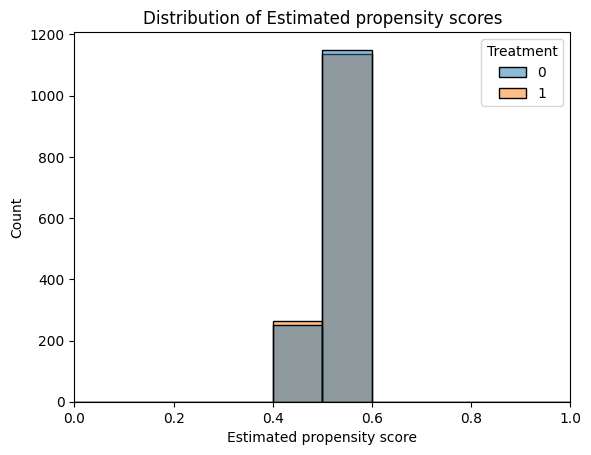

In [26]:
#傾向スコア推定値の可視化
ax = sns.histplot(
    data=df, x="ps_hat", hue="T",
    bins=np.arange(0, 1.1, 0.1), common_norm=False
)

plt.xlim(0, 1)
plt.xticks(np.linspace(0, 1, 6))  # 0.0, 0.2, ..., 1.0
plt.title("Distribution of Estimated propensity scores")
plt.xlabel("Estimated propensity score")
ax.legend_.set_title("Treatment")
plt.show()


ATE推定量の実装：
*   IPW（Horvitz–Thompson型）
*   IPW（Hajek型）
*   G-computation
*   AIPW






In [27]:
results = {}

\begin{aligned}
{naive} =
\frac{1}{n} \sum_{i=1}^n \left\{T_i Y_i
-(1-T_i)Y_i \right\}
\end{aligned}

In [28]:
#単純比較
mean_treat = df.loc[df["T"]==1, "Y"].mean()
mean_control = df.loc[df["T"]==0, "Y"].mean()
ate_naive = mean_treat - mean_control

results["Naive"] = ate_naive
print("ATE (Naive Difference):", results["Naive"])

ATE (Naive Difference): 119.45405714292428


\begin{aligned}
\hat{ATE}_{IPW-
Horvitz–Thompson} =&
\frac{1}{n}\sum_{i=1}^n \left\{\frac{T_i Y_i}{̂{\pi}(X_i)}
-\frac{(1-T_i)Y_i}{1-̂{\pi}(X_i)}\right\}
\\ \\
\because{{\pi}(X)}=&P(T=1|X)
\end{aligned}

In [29]:
# IPW推定量： Horvitz–Thompson型（HT型）
df["ate_hat_ipw_HT"]  = df["T"]*df["Y"]/df["ps_hat"] - (1-df["T"])*df["Y"]/(1-df["ps_hat"])
results["IPW_HT"] = df["ate_hat_ipw_HT"].mean()
#各サンプルの重み（プロット用）
df["w_ipw_ht"] = np.where(df["T"] == 1, 1/df["ps_hat"] , 1/(1-df["ps_hat"] ))
print("ATE (IPW_HT):",results["IPW_HT"])

# ---- サンドイッチ分散と信頼区間 ----
n = len(df)

# サンプル寄与
ht_terms = df["ate_hat_ipw_HT"]

# 推定値
ate_ht = ht_terms.mean()

# 影響関数（寄与 - 推定値）
phi = ht_terms - ate_ht

# 分散推定（サンドイッチ）
var_ht = np.mean(phi**2) / n
se_ht = np.sqrt(var_ht)

# 95% 信頼区間
ci_low, ci_high = ate_ht - 1.96*se_ht, ate_ht + 1.96*se_ht

print(f"ATE (IPW_HT): {ate_ht:.4f}")
print(f"SE (sandwich): {se_ht:.4f}")
print(f"95% CI: [{ci_low:.4f}, {ci_high:.4f}]")

ATE (IPW_HT): -814.9753657391242
ATE (IPW_HT): -814.9754
SE (sandwich): 9010.7437
95% CI: [-18476.0330, 16846.0822]


\begin{aligned}
\hat{ATE}_{IPW-Hajek} =&
\frac{\sum_{i=1}^n \frac{T_i Y_i}{̂{\pi}(X_i)}}{\sum_{i=1}^n \frac{T_i}{̂{\pi}(X_i)}}
-
\frac{\sum_{i=1}^n \frac{(1-T_i)Y_i}{1-̂{\pi}(X_i)}}{\sum_{i=1}^n \frac{(1-T_i)}{1-̂{\pi}(X_i)}}
\end{aligned}

In [46]:
#IPW推定量： Hajek型
#df["w_ipw_hajek"] = np.where(df["T"] == 1, w1/den1, w0/den0)
df["w_ipw_treat_h"] = df["T"] / df["ps_hat"]
df["w_ipw_control_h"] = (1 - df["T"]) / (1 - df["ps_hat"])
num1 = (df["w_ipw_treat_h"] * df["Y"]).sum()
den1 = df["w_ipw_treat_h"].sum()
num0 = (df["w_ipw_control_h"] * df["Y"]).sum()
den0 = df["w_ipw_control_h"].sum()

#各サンプルの重み（プロット用）
df["w_ipw_hajek"] = np.where(
    df["T"] == 1,
    df["w_ipw_treat_h"] / den1,
    df["w_ipw_control_h"] / den0
)

ate_hat_ipw_H = (num1/den1) - (num0/den0)
#results["IPW_H"] = ate_hat_ipw_H

# ---- Hajek のサンドイッチSEと95%CI（修正版）----
n = len(df)

# 1. mu1とmu0を定義 (Hajek推定量で計算した加重平均)
mu1 = num1 / den1
mu0 = num0 / den0

# 2. 影響関数 (IF) の正しい計算
# IF = n/den * w * (Y - mu) の形になる
IF_1 = (n / den1) * df["w_ipw_treat_h"] * (df["Y"] - mu1)
IF_0 = (n / den0) * df["w_ipw_control_h"] * (df["Y"] - mu0)
IF = IF_1 - IF_0

# 分散推定（サンドイッチ）
# ここから下のロジックは正しいです
var_hajek = np.mean(IF**2) / n
se_hajek = np.sqrt(var_hajek)

# 95% 信頼区間（正規近似）
# ate_hat_ipw_H を使うとより安全
ci_low = ate_hat_ipw_H - 1.96 * se_hajek
ci_high = ate_hat_ipw_H + 1.96 * se_hajek

print("ATE (IPW_h):", ate_hat_ipw_H)
print(f"SE  (sandwich) : {se_hajek:.6f}")
print(f"95% CI         : [{ci_low:.6f}, {ci_high:.6f}]")

ATE (IPW_h): -27.274834396026563
SE  (sandwich) : 2802.863688
95% CI         : [-5520.887663, 5466.337994]


\begin{aligned}
\hat{ATE}_{G-computation}
=& \frac{1}{n} \sum_{i=1}^n \left\{ ̂{\mu}_1(X_i) - ̂{\mu}_0(X_i) \right\}\\ \\
 \because {\mu}_t(X)=& E[Y|T=t,X]
\end{aligned}

/tmp/ipython-input-4258681584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="T", y="w_ipw_ht", ax=axes[0], palette="Set2")
/tmp/ipython-input-4258681584.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="T", y="w_ipw_hajek", ax=axes[1], palette="Set2")


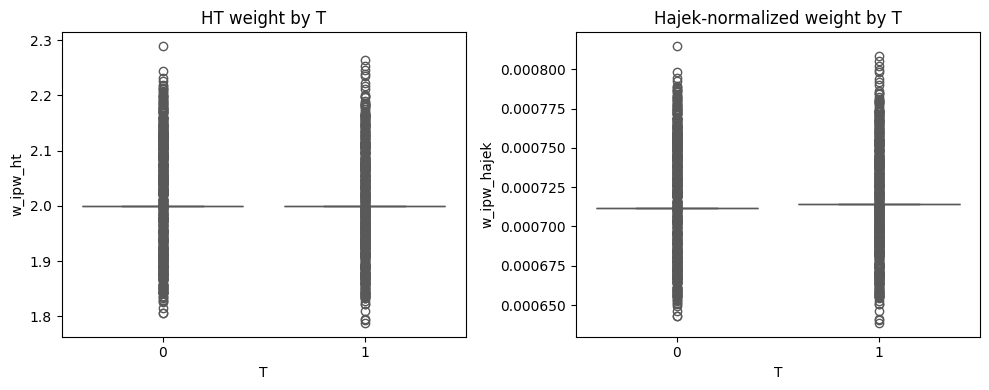

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# HT weight
sns.boxplot(data=df, x="T", y="w_ipw_ht", ax=axes[0], palette="Set2")
axes[0].set_title("HT weight by T")
axes[0].set_xlabel("T")
axes[0].set_ylabel("w_ipw_ht")

# Hajek weight
sns.boxplot(data=df, x="T", y="w_ipw_hajek", ax=axes[1], palette="Set2")
axes[1].set_title("Hajek-normalized weight by T")
axes[1].set_xlabel("T")
axes[1].set_ylabel("w_ipw_hajek")

plt.tight_layout()
plt.show()

In [49]:
# G-computation推定量

df["ate_hat_gcomp"] = df["mu1"] - df["mu0"]
results["G-computation"] = df["ate_hat_gcomp"].mean()

print("ATE (G-computation, RF):", results["G-computation"])

B = 500  # リサンプリング回数
n = len(df)
boot_ates = []

rng = np.random.default_rng(5436)

for b in range(B):
    s = rng.choice(n, size=n, replace=True)
    boot_df = df.iloc[s]

    # ATE(G-computation) を再計算
    tau_b = (boot_df["mu1"] - boot_df["mu0"]).mean()
    boot_ates.append(tau_b)

boot_ates = np.array(boot_ates)

# 推定値・SE・95%CI
ate_gcomp = results["G-computation"]
se_boot = boot_ates.std(ddof=1)
ci_low, ci_high = np.percentile(boot_ates, [2.5, 97.5])

print(f"ATE (G-computation, RF): {ate_gcomp:.4f}")
print(f"SE  (bootstrap): {se_boot:.4f}")
print(f"95% CI (bootstrap): [{ci_low:.4f}, {ci_high:.4f}]")

ATE (G-computation, RF): 67.66736580701807
ATE (G-computation, RF): 67.6674
SE  (bootstrap): 31.2323
95% CI (bootstrap): [8.4675, 124.1672]


\begin{aligned}
\hat{ATE}_{AIPW} = \frac{1}{n} \sum_{i=1}^n \left( \frac{T_i Y_i}{̂{\pi}(X_i)} - \frac{T_i - ̂{\pi}(X_i)}{̂{\pi}(X_i)} ̂{\mu}_1(X_i) \right)
	-	\frac{1}{n} \sum_{i=1}^n \left( \frac{(1 - T_i) Y_i}{1 - ̂{\pi}(X_i)} + \frac{T_i - ̂{\pi}(X_i)}{1 - ̂{\pi}(X_i)} ̂{\mu}_0(X_i) \right)
\end{aligned}

In [55]:
# AIPW（Doubly Robust）推定量
df["aipw_term_1"]= (df["T"]*df["Y"] / df["ps_hat"]) - ((df["T"]-df["ps_hat"])*df["mu1"]/df["ps_hat"])
df["aipw_term_0"]=((1-df["T"])*df["Y"] / (1-df["ps_hat"])) + ((df["T"]-df["ps_hat"])*df["mu0"]/(1-df["ps_hat"]))

ate_hat_aipw = df["aipw_term_1"].mean() - df["aipw_term_0"].mean()
results["AIPW"] = ate_hat_aipw

# 1. 各個人のAIPWスコアを計算
psi_aipw = df["aipw_term_1"] - df["aipw_term_0"]

# 2. ATEの点推定（スコアの平均）
ate_aipw = psi_aipw.mean()
results["AIPW"] = ate_aipw

# 3. 影響関数を計算 (スコア - 平均値)
IF_aipw = psi_aipw - ate_aipw

# 4. 分散と標準誤差、信頼区間を計算
n = len(df)
var_aipw = np.mean(IF_aipw**2) / n
se_aipw = np.sqrt(var_aipw)

ci_low = ate_aipw - 1.96 * se_aipw
ci_high = ate_aipw + 1.96 * se_aipw

# 5. 結果を出力
print("ATE (AIPW):", results["AIPW"] )
print(f"SE  (sandwich) : {se_aipw:.6f}")
print(f"95% CI         : [{ci_low:.6f}, {ci_high:.6f}]")

ATE (AIPW): 33.67792482831997
SE  (sandwich) : 2817.625645
95% CI         : [-5488.868339, 5556.224188]


In [ ]:
# 前提：以下の変数がすでに計算済みであるとします
# tau_rorr: RORRによるATEの推定値
# Y_tilde: アウトカムモデルの残差 (Y - mu_hat)
# T_tilde: 処置モデルの残差 (T - p_hat)

# --- RORRのサンドイッチSEと95%CI ---

# 1. 最終モデルの残差を計算
final_residuals = Y_tilde - T_tilde * tau_rorr

# 2. 処置モデルの残差の2乗の期待値を推定
E_T_tilde_sq = np.mean(T_tilde**2)

# 3. 影響関数を計算
IF_rorr = (T_tilde * final_residuals) / E_T_tilde_sq

# 4. 分散、標準誤差、信頼区間を計算
n = len(df)
var_rorr = np.mean(IF_rorr**2) / n
se_rorr = np.sqrt(var_rorr)

ci_low = tau_rorr - 1.96 * se_rorr
ci_high = tau_rorr + 1.96 * se_rorr

print(f"ATE (RORR/DDML): {tau_rorr:.6f}")
print(f"SE  (sandwich) : {se_rorr:.6f}")
print(f"95% CI         : [{ci_low:.6f}, {ci_high:.6f}]")

In [ ]:
df_ATE_result = pd.DataFrame(results, index=[0])
df_ATE_result

重み付き前後のSMDの出力

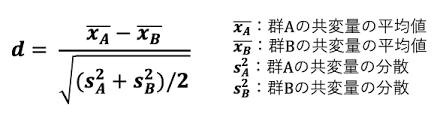

In [ ]:
def compute_smd(df, covariates, treatment, weights=None):
    smd_list = {}
    for cov in covariates:
        # 重みなし
        if weights is None:
            mean_treat = df.loc[df[treatment]==1, cov].mean()
            mean_control = df.loc[df[treatment]==0, cov].mean()
            var_treat = df.loc[df[treatment]==1, cov].var()
            var_control = df.loc[df[treatment]==0, cov].var()
        #重みあり
        else:
            w = weights
            mean_treat = np.average(df.loc[df[treatment]==1, cov], weights=w[df[treatment]==1])
            mean_control = np.average(df.loc[df[treatment]==0, cov], weights=w[df[treatment]==0])
            var_treat = np.average((df.loc[df[treatment]==1, cov]-mean_treat)**2, weights=w[df[treatment]==1])
            var_control = np.average((df.loc[df[treatment]==0, cov]-mean_control)**2, weights=w[df[treatment]==0])
        # SMD
        smd = (mean_treat - mean_control) / np.sqrt((var_treat + var_control)/2)
        smd_list[cov] = smd
    return smd_list

In [ ]:
#重みとSMDの計算
# Unweighted
smd_unweighted = compute_smd(df, X_cols, "T")

# IPW_HT
w_ipw_HT = df["T"]/df["ps_hat"] + (1-df["T"])/(1-df["ps_hat"])
smd_ipw_HT = compute_smd(df, X_cols, "T", weights=w_ipw_HT)

# IPW_H
w1 = df["T"]/df["ps_hat"]; w0 = (1-df["T"])/(1-df["ps_hat"])
w_ipw_H = np.where(df["T"]==1, w1/w1.sum(), w0/w0.sum())
smd_ipw_H = compute_smd(df, X_cols, "T", weights=w_ipw_H)

#格納
smd_df = pd.DataFrame({
    "Unweighted": smd_unweighted,
    "IPW": smd_ipw_H
    #"IPW-HT": smd_ipw_HT,
    #"IPW-H": smd_ipw_H
}).T

In [ ]:
plt.figure(figsize=(6,4))
for method in smd_df.index:
    plt.scatter(smd_df.loc[method].values, smd_df.columns, label=method, alpha=0.8)
plt.axvline(0.1, color="k", linestyle="--")  # SMD=0.1基準
plt.axvline(0.25, color="k", linestyle=":")
plt.xlabel("Standardized Mean Difference")
plt.ylabel("Covariates")
plt.legend()
plt.title("Covariate Balance Before/After Weighting")
plt.show()

RORR、AIPW提案手法の実装

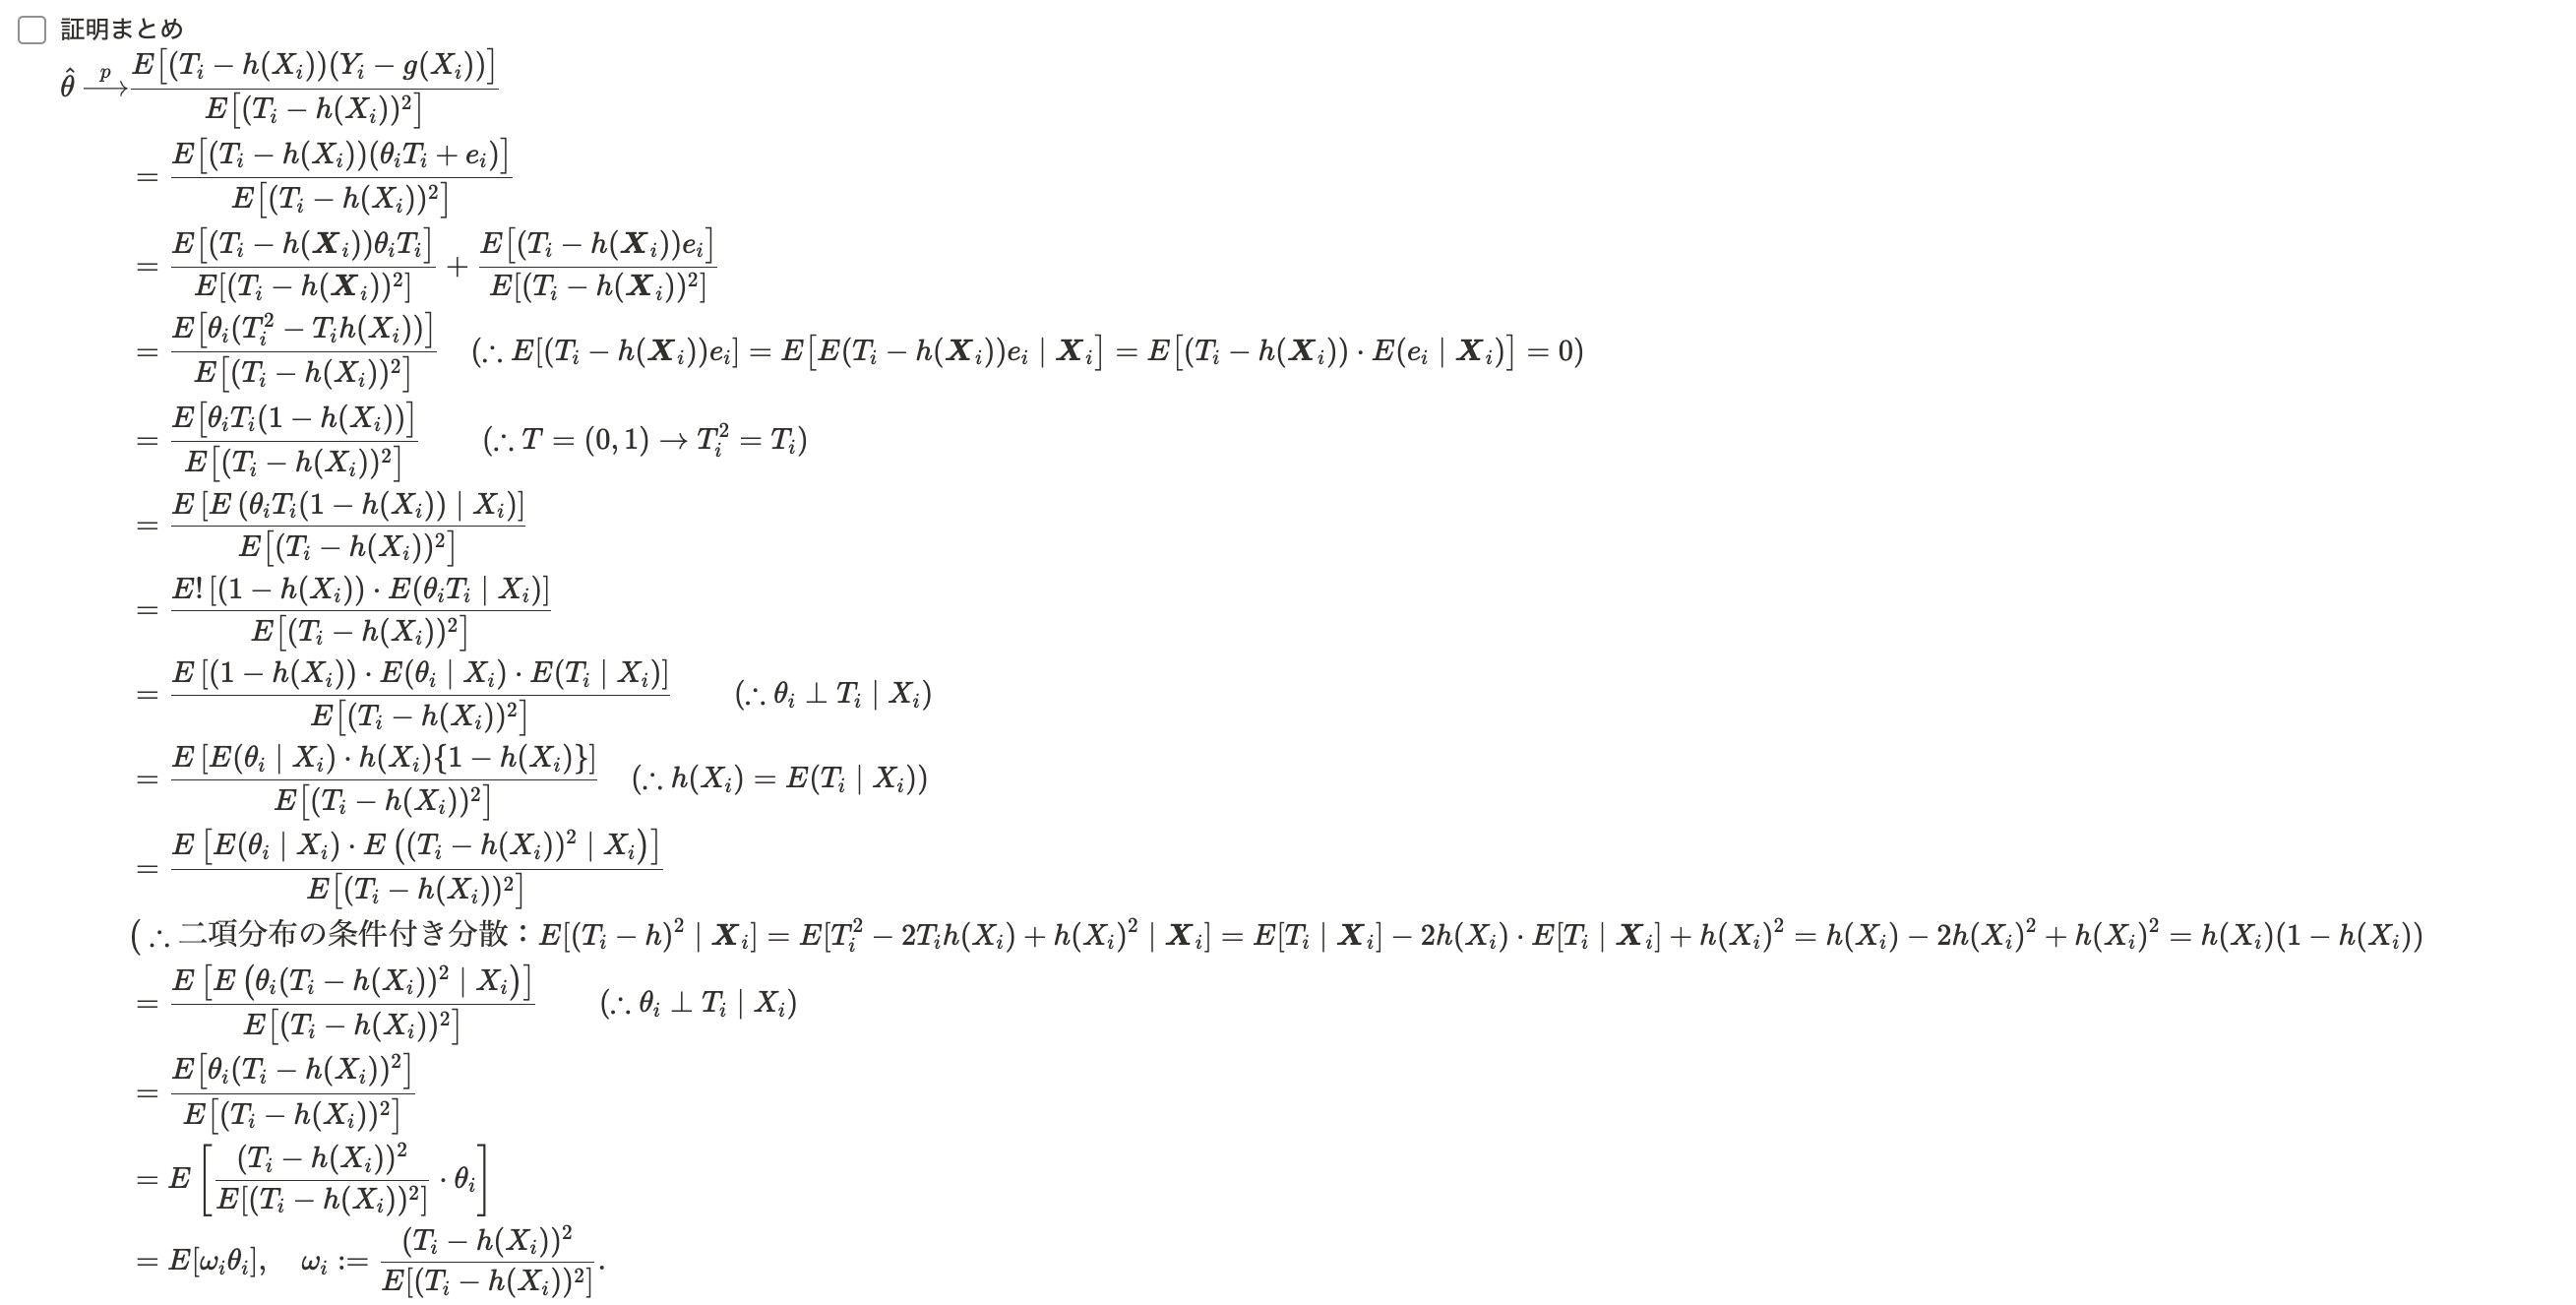

In [ ]:
#RORRのATE推定値のバイアスの分析
# --- RORR の暗黙の重みを計算して可視化（追記）---

# 重み：ω_i = (T_tilde^2) / E[T_tilde^2]
w_rorr = (T_tilde**2) / E_T_tilde_sq
df["w_rorr"] = w_rorr

# 参考: 有効サンプルサイズ（どれくらい効いているかの指標）
n_eff = (w_rorr.sum()**2) / (w_rorr**2).sum()
print(f"Effective sample size under RORR weights: {n_eff:.1f} / {len(df)}")

# ヴァイオリンプロット（T別）
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
sns.violinplot(
    data=df, x="T", y="w_rorr",
    hue="T", dodge=False, inner="quartile", cut=0, ax=ax, palette="Set2"
)
ax.set_title("RORR implicit weights by T")
ax.set_xlabel("T")
ax.set_ylabel("w_rorr = (T-ps_hat)^2 / E[(T-ps_hat)^2]")
ax.legend_.set_title("T")
plt.tight_layout()
plt.show()

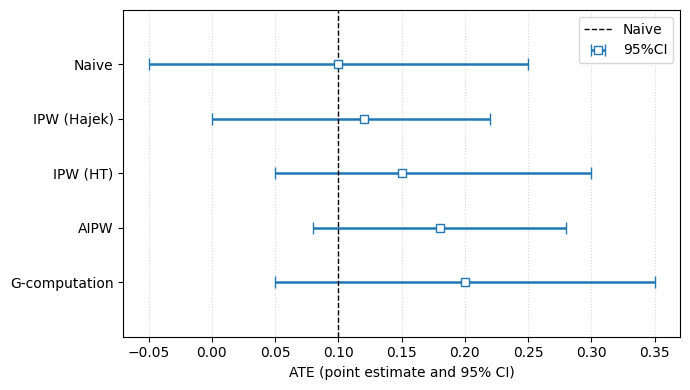

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==== ダミーデータ（テスト用） ====
results = {
    "Naive":         0.10,
    "Naive_CI_lower": -0.05,
    "Naive_CI_upper": 0.25,
    "IPW_HT":        0.15,
    "IPW_HT_CI_lower": 0.05,
    "IPW_HT_CI_upper": 0.30,
    "IPW_H":         0.12,
    "IPW_H_CI_lower": 0.00,
    "IPW_H_CI_upper": 0.22,
    "G-computation": 0.20,
    "G-computation_CI_lower": 0.05,
    "G-computation_CI_upper": 0.35,
    "AIPW":          0.18,
    "AIPW_CI_lower": 0.08,
    "AIPW_CI_upper": 0.28,
}

# ===== 設定 =====
ref_line = results["Naive"]  # 基準線をNaiveに

candidates = [
    ("Naive",         "Naive"),
    ("IPW (HT)",      "IPW_HT"),
    ("IPW (Hajek)",   "IPW_H"),
    ("G-computation", "G-computation"),
    ("AIPW",          "AIPW"),
]

rows = []
for label, key in candidates:
    if key in results:
        est = results[key]
        lo = results.get(f"{key}_CI_lower", np.nan)
        hi = results.get(f"{key}_CI_upper", np.nan)
        rows.append({"Estimator": label, "ATE": est, "CI_L": lo, "CI_U": hi})

plot_df = pd.DataFrame(rows).sort_values("ATE").reset_index(drop=True)
y = np.arange(len(plot_df))[::-1]

xerr_left  = plot_df["ATE"] - plot_df["CI_L"]
xerr_right = plot_df["CI_U"] - plot_df["ATE"]
xerr = np.vstack([xerr_left, xerr_right])

fig, ax = plt.subplots(figsize=(7, 0.6*len(plot_df)+1))

# エラーバー
points = ax.errorbar(
    plot_df["ATE"], y, xerr=xerr,
    fmt='s', ms=6, mfc='white', mec='tab:blue', ecolor='tab:blue', capsize=4, lw=1.8,
    label="95%CI"
)

# Naive基準線
line = ax.axvline(ref_line, color='k', ls='--', lw=1, label="Naive")

# 軸とラベル
ax.set_yticks(y)
ax.set_yticklabels(plot_df["Estimator"])
ax.set_xlabel("ATE (point estimate and 95% CI)")
ax.set_ylim(-1, len(plot_df))
# 横軸の範囲を固定
ax.set_xlim(-0.1, 0.4)
ax.xaxis.grid(True, which='major', ls=':', alpha=0.5)
ax.set_axisbelow(True)

# 凡例
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()

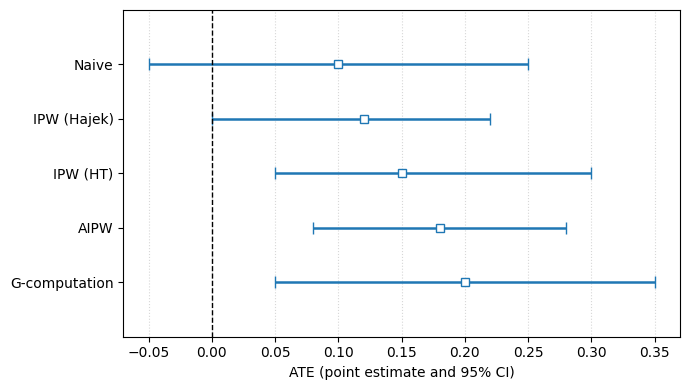

/tmp/ipython-input-1269518633.py:73: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1269518633.py:73: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1269518633.py:73: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1269518633.py:73: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

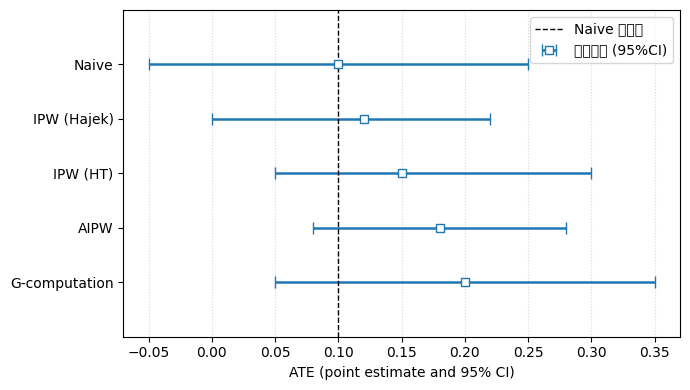